# EXTENDED FIGURE 6

In [2]:
import os
import requests
import pandas as pd
import numpy as np
import cloudvolume
from caveclient import CAVEclient
import nglui
from statistics import mean
import matplotlib.pyplot as plt


In [3]:
#Load dataframe
synapse_table = pd.read_feather("ET_extended_synapse_table.feather")

In [4]:
syn_per_con = []

pre_soma_IDs = synapse_table.pre_pt_root_id.unique()

for ii,pre_soma_ID in enumerate(pre_soma_IDs): 
    
    #print(pre_soma_ID)
    
    post_soma_IDs =  synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID)].post_pt_root_id.unique()
    
    for ii,post_soma_ID in enumerate(post_soma_IDs):
        
        values = {
            
            
#          print(len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
#                                     (synapse_table['post_pt_root_id'] == post_soma_ID)]))         
                    'syn_per_con': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                        (synapse_table['post_pt_root_id'] == post_soma_ID)]),
                    
                    'subclass': synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                        (synapse_table['post_pt_root_id'] == post_soma_ID)].consensus_class.iloc[0],
                    
                    'pre_pt_root_id': pre_soma_ID, 
                    
                    'post_pt_root_id': post_soma_ID, 
                    
        }
        syn_per_con.append(values)
    
syn_per_con_df = pd.DataFrame(syn_per_con)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


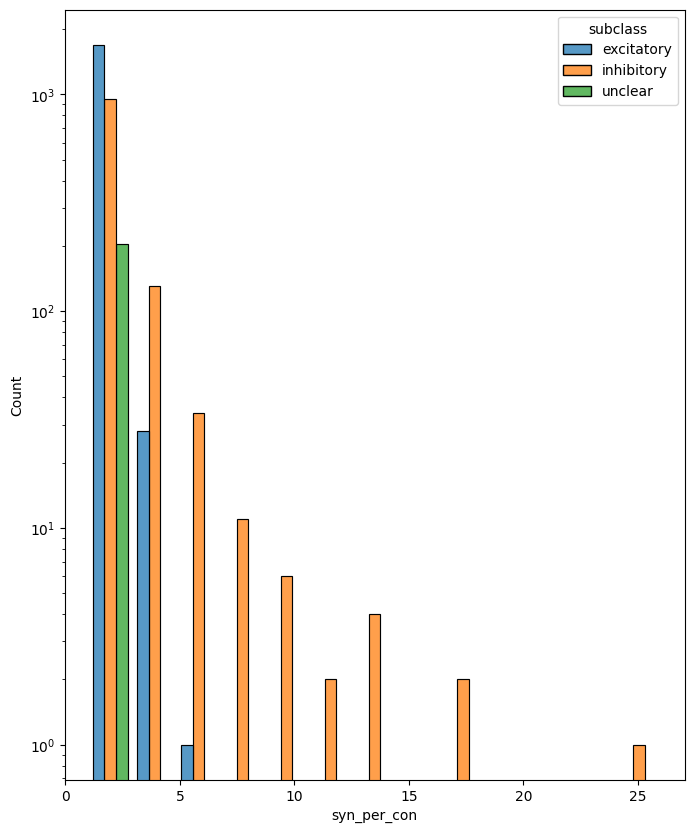

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,10))

ax = sns.histplot(data=syn_per_con_df, x="syn_per_con", hue="subclass", multiple="dodge", shrink=.8)


ax.set_yscale('log') 
plt.savefig('Extended_6.eps')

